<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-04-06 22:13:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  37.1MB/s    in 0.9s    

2021-04-06 22:13:48 (37.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bcd798b50>]],
      dtype=object)

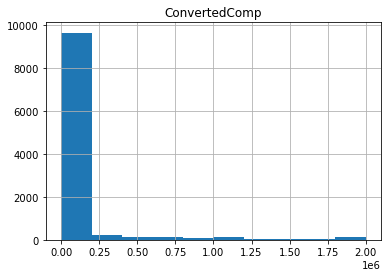

In [8]:
# your code goes here

#Query from database
QUERY = """

SELECT * FROM master

"""


df = pd.read_sql_query(QUERY,conn)


#plot histogram
df.hist(column = 'ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


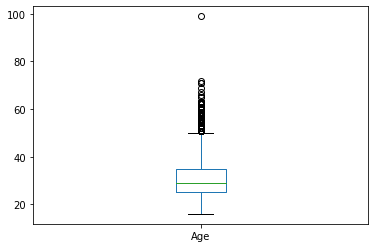

In [9]:
# your code goes here


QUERY1 = """

SELECT Age, Respondent 
FROM master

"""

df1=pd.read_sql_query(QUERY1,conn)

df1.boxplot(column =['Age'], grid = False)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


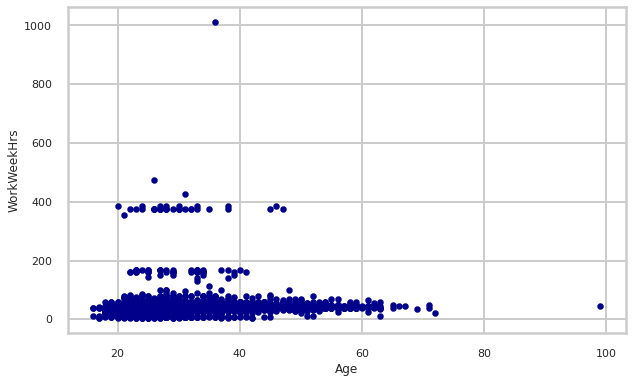

In [10]:
# your code goes here


QUERY = """

SELECT Age,ConvertedComp,WorkWeekHrs,CodeRevHrs,MainBranch
FROM master

"""

df2=pd.read_sql_query(QUERY,conn)


sns.set_context("poster", font_scale=0.50)
sns.set_style("whitegrid")
df2.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0, 0.5, 'WorkWeekHrs')

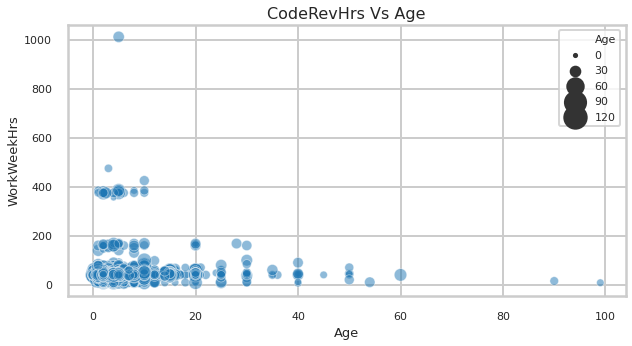

In [11]:
# your code goes here

#create query from database
QUERY = """

SELECT WorkWeekHrs, CodeRevHrs, Age from master

"""

bubble=pd.read_sql_query(QUERY,conn)

#set style parameters
sns.set_context("poster", font_scale=0.50)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))


#function for the actual plot
sns.scatterplot(bubble['CodeRevHrs'], bubble['WorkWeekHrs'], size=bubble['Age'], sizes=(10,500), alpha=0.5)

#title and axis labels
plt.title('CodeRevHrs Vs Age', size=16)
plt.xlabel('Age', size=13)
plt.ylabel('WorkWeekHrs', size=13)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


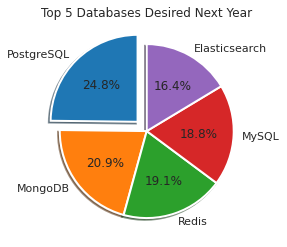

In [12]:
# your code goes here

#create query from database with SELECT statement
QUERY = """

SELECT COUNT(DatabaseDesireNextYear) as COUNT,
DatabaseDesireNextYear FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear 
ORDER BY COUNT(DatabaseDesireNextYear) DESC LIMIT 5

"""

df3=pd.read_sql_query(QUERY,conn)

#index the top 5 from your variable df3
df3.set_index('DatabaseDesireNextYear',inplace=True)

#create plot for pie chart
sizes=df3.iloc[:,0]
plt.pie(sizes, labels=df3.index, startangle=90, shadow=True, explode = (0.15, 0, 0, 0, 0), autopct='%1.1f%%')

#labels
plt.title('Top 5 Databases Desired Next Year')
plt.show()



In [13]:
#question - in the list of most popular languages respondents wish to learn next year, what is the rank of Python?



QUERY = """

SELECT COUNT(LanguageDesireNextYear) as COUNT,
LanguageDesireNextYear FROM LanguageDesireNextYear 
GROUP BY LanguageDesireNextYear 
ORDER BY COUNT(LanguageDesireNextYear) DESC LIMIT 5

"""

df7=pd.read_sql_query(QUERY,conn)

#index the top 5 from your variable df3
df7.set_index('LanguageDesireNextYear',inplace=True)

df7.head(5)


,COUNT
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

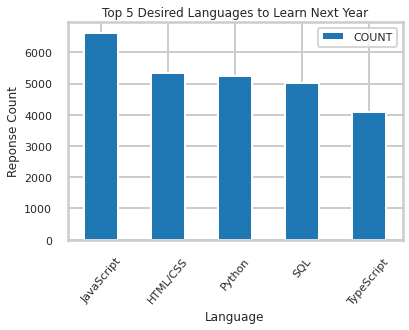

In [14]:
df7.plot(kind = 'bar', stacked = False)

#title and axis labels
plt.title('Top 5 Desired Languages to Learn Next Year')
plt.xlabel('Language')
plt.ylabel('Reponse Count')
plt.xticks(rotation=50)

In [15]:
#question - How many respondents indicated that they currently work with 'SQL'?  



QUERY = """

SELECT COUNT(LanguageWorkedWith) as COUNT,
LanguageWorkedWith FROM LanguageWorkedWith 
GROUP BY LanguageWorkedWith 
ORDER BY COUNT(LanguageWorkedWith) DESC LIMIT 5

"""

df8=pd.read_sql_query(QUERY,conn)

#index the top 5 from your variable df3
df8.set_index('LanguageWorkedWith',inplace=True)

df8.head(5)


,COUNT
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

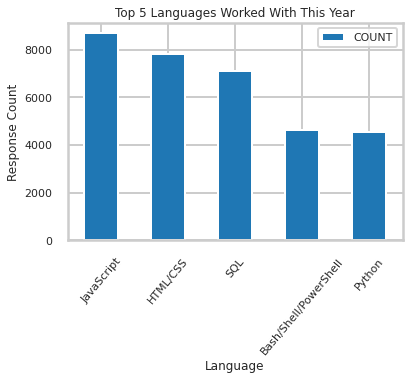

In [20]:
df8.plot(kind = 'bar', stacked = False)

#title and axis labels
plt.title('Top 5 Languages Worked With This Year')
plt.xlabel('Language')
plt.ylabel('Response Count')
plt.xticks(rotation=50)

In [22]:
#question How many respondents indicated that they work on 'MySQL' only? 

#create query from database with SELECT statement
QUERY = """

SELECT COUNT(DatabaseWorkedWith) as COUNT,
DatabaseWorkedWith FROM DatabaseWorkedWith 
GROUP BY DatabaseWorkedWith 
ORDER BY COUNT(DatabaseWorkedWith) DESC LIMIT 5

"""

df9=pd.read_sql_query(QUERY,conn)

#index the top 5 from your variable df3
df9.set_index('DatabaseWorkedWith',inplace=True)



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

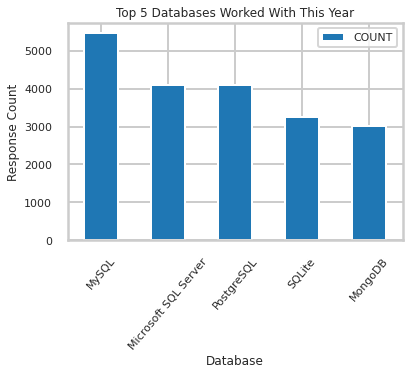

In [24]:
#title and axis labels
df9.plot(kind = 'bar', stacked = False)
plt.title('Top 5 Databases Worked With This Year')
plt.xlabel('Database')
plt.ylabel('Response Count')
plt.xticks(rotation=50)

In [18]:
QUERY = """

SELECT COUNT(DatabaseDesireNextYear) as COUNT,
DatabaseDesireNextYear FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear 
ORDER BY COUNT(DatabaseDesireNextYear) DESC LIMIT 5

"""

df10=pd.read_sql_query(QUERY,conn)

#index the top 5 from your variable df3
df10.set_index('DatabaseDesireNextYear',inplace=True)

df10.head(5)

,COUNT
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

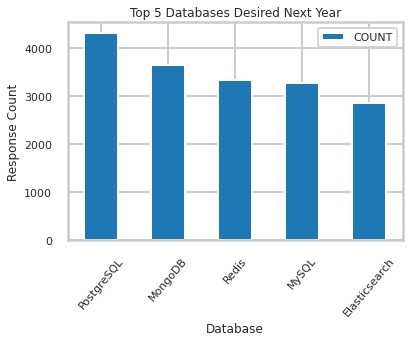

In [19]:
#title and axis labels
df10.plot(kind = 'bar', stacked = False)
plt.title('Top 5 Databases Desired Next Year')
plt.xlabel('Database')
plt.ylabel('Response Count')
plt.xticks(rotation=50)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0, 0.5, 'Hours')

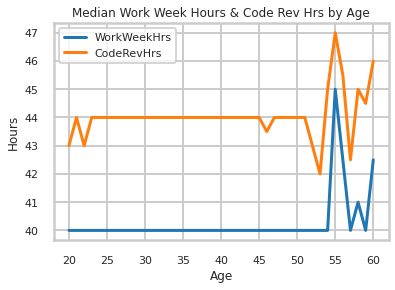

In [32]:
# your code goes here

#query the database with Select statement 
QUERY = """

SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 20 and 60

"""

df4=pd.read_sql_query(QUERY,conn)

#group results to get median
age_group = df4.groupby(by='Age')
age_group_median = age_group.median()

age_group_median.plot(kind = 'line', stacked = True)

#title and axis labels
plt.title('Median Work Week Hours & Code Rev Hrs by Age')
plt.xlabel('Age')
plt.ylabel('Hours')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0, 0.5, 'ConvertedComp')

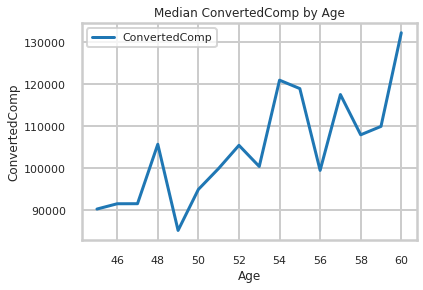

In [26]:
# your code goes here

QUERY = """

SELECT ConvertedComp, Age
FROM Master
WHERE Age BETWEEN 45 and 60"""

df5=pd.read_sql_query(QUERY,conn)

age_group = df5.groupby(by='Age')
age_group_median = age_group.median()

age_group_median.plot(kind = 'line')

#title and axis labels
plt.title('Median ConvertedComp by Age')
plt.xlabel('Age')
plt.ylabel('ConvertedComp')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5, 0, 'MainBranch')

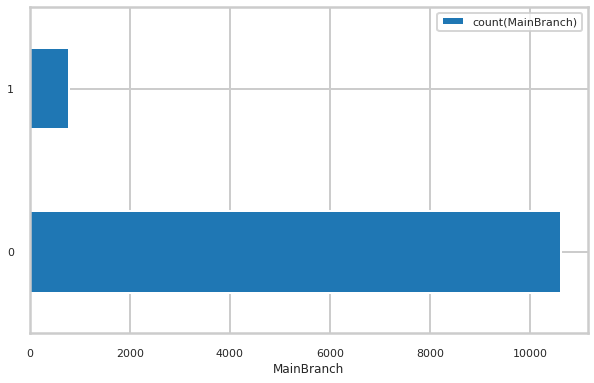

In [27]:
# your code goes here
#query data from the database - must use count and group by to avoid error of no numerical data
QUERY = """

SELECT MainBranch, count(MainBranch)
FROM master
group by MainBranch

"""

#run query
df6=pd.read_sql_query(QUERY,conn)

#plot horizontal bar
df6.plot(kind='barh', figsize=(10, 6))


#title and axis labels
plt.xlabel('MainBranch')


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
